<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/version_3/C1/W2/ungraded_labs/C1_W2_Lab_2_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Using Callbacks to Control Training

In this lab, you will use the [Callbacks API](https://keras.io/api/callbacks/) to stop training when a specified metric is met. This is a useful feature so you won't need to complete all epochs when this threshold is reached. For example, if you set 1000 epochs and your desired accuracy is already reached at epoch 200, then the training will automatically stop. Let's see how this is implemented in the next sections.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.


## Load and Normalize the Fashion MNIST dataset

Like the previous lab, you will use the Fashion MNIST dataset again for this exercise. And also as mentioned before, you will normalize the pixel values to help optimize the training.

In [ ]:
# Install packages for compatibility

# NOTE: You can safely ignore errors about version incompatibility of
# Colab-bundled packages (e.g. xarray, pydantic, etc.)

!pip install tf-keras==2.15 --quiet
!pip install tensorflow==2.15 --quiet
!pip install keras==2.15 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.

In [ ]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


## Creating a Callback class

You can create a callback by defining a class that inherits the [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) base class. From there, you can define available methods to set where the callback will be executed. For instance below, you will use the [on_epoch_end()](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback#on_epoch_end) method to check the loss at each training epoch.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

## Define and compile the model

Next, you will define and compile the model. The architecture will be similar to the one you built in the previous lab. Afterwards, you will set the optimizer, loss, and metrics that you will use for training.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Now you are ready to train the model. To set the callback, simply set the `callbacks` parameter to the `myCallback` instance you declared before. Run the cell below and observe what happens.

In [ ]:
# Train the model with a callback
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4725 - accuracy: 0.8326
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3586 - accuracy: 0.8691
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3586 - accuracy: 0.8691


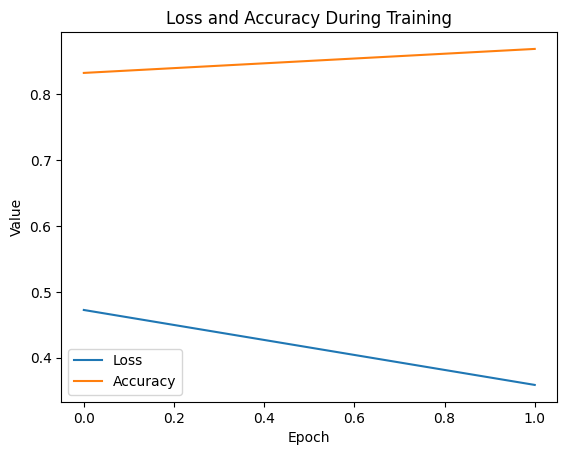

In [ ]:
import matplotlib.pyplot as plt

# Plot loss and accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Loss and Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

You will notice that the training does not need to complete all 10 epochs. By having a callback at the end of each epoch, it is able to check the training parameters and compare if it meets the threshold you set in the function definition. In this case, it will simply stop when the loss falls below `0.40` after the current epoch.

*Optional Challenge: Modify the code to make the training stop when the accuracy metric exceeds 60%.*

That concludes this simple exercise on callbacks!

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.4715 - accuracy: 0.8326
Accuracy has exceeded 60%, so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4710 - accuracy: 0.8328


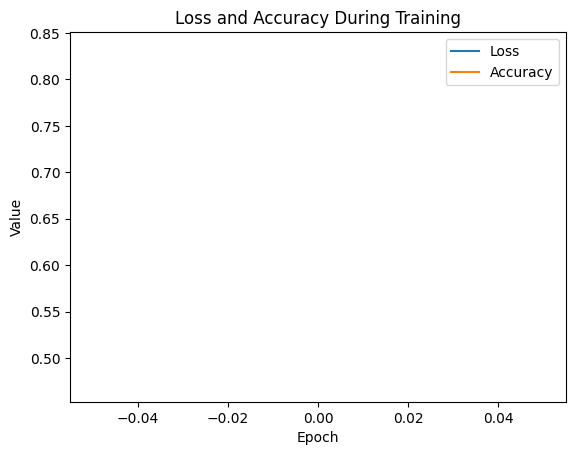

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the accuracy exceeds 60%

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('accuracy') > 0.6):

      # Stop if threshold is met
      print("\nAccuracy has exceeded 60%, so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a callback
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

import matplotlib.pyplot as plt

# Plot loss and accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Loss and Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()